## What you will find in this notebook

There are two goals:

1. To see an example in which k-means, a widely known clustering algorithm, works well, and an example in which it does not work well. The case in which it does not work well is left as an exercise, which you will find at the end of this notebook.
2. On the way, you will learn very basic python, and, in particular, how to manipulate data.

Please complete the activities marked as **Do** or **Your Answer**. Make an effort to read the code and the comments, and to try to understand what each step is doing.

---

### 1. Importing  libraries

**Do:** Import ``numpy`` and name it ``np``, as this is standard practice.
Numpy is a library (i.e., a collection of functions, constants, etc. See https://www.geeksforgeeks.org/libraries-in-python/) for matrix and vector operations. See: https://numpy.org/

Please read the content of the cell below. Lines starting with numeral (#) are comments, which will not be evaluated, and the rest is the code that will run. 

In [2]:
# To run this cell, click anywhere on it (to select it) and:
#   option 1 (mouse): click the Run button (the black triangle) at the top of the page
#   option 2 (keyboard): press Ctrl + Enter (Windows, Linux) | Command + Enter (Mac)

import numpy as np


If everything went well, the ``In [ ]:`` on the top left of the cell will be replaced by ``In [ 1 ]:``. If you   run the cell again, the counter `` 1 `` will increase. Afterwards, numpy will be available for use in this notebook.

**Do:** Please run the cell below

In [3]:
x = np.arange(7) 
print('The numpy array x is qual to', x)
print('The sum of its entries is:', np.sum(x))

The numpy array x is qual to [0 1 2 3 4 5 6]
The sum of its entries is: 21


If everything went well, you will be able to see the array ``x`` and the sum of its  entries.

**Important:** If you get the error message:  

``NameError: name 'np' is not defined``

it is because you did not import numpy (as np) before using it. Please go to the previous cell and do that. 
_Lesson:_ The order in which you run Juptyer notebook cells matters.

---

### 2. Plotting functionality

``matplotlib`` is the standard Python library for creating plots and visualizations  (https://matplotlib.org/). The cell below imports a portion of if (i.e., a module) called ``pyplot``, as well as a complementary library called Glasbey.

In [6]:
# from the matplotlib library, import the pyplot module, for plotting. We give it the name plt as this is standard practice
from matplotlib import pyplot as plt

# glasbey gives an easy way to create color palettes with very different colors. 
# This is useful for coloring clusterings.
import glasbey


It is often useful to have custom functions (e.g., not included in available libraries), and the cell below defines two: ``cluster_colors`` and ``plot_clustering``. 

**Do:** Please run the cell below.

In [7]:
# a simple wrapper for glasbey
def cluster_colors(n_classes):
    return np.array(glasbey.create_palette(palette_size=n_classes))

# a function that will plot a 2D dataset and, optionally, color it according
# to a user given clustering. If no clustering is given, all data points are
# colored with the same color.
# Moreover, the cluster label is allowed to be -1. In that case the point is
# considered "unclustered" and is colored in gray
def plot_clustering(X, clustering = None, sizes=[5, 1], noise_points=True, axis=True):
    if clustering is None:
        clustering = np.ones(X.shape[0], dtype=int)
    X_clustered = X[clustering != -1]
    X_unclustered = X[clustering == -1]
    clustering_clustered = clustering[clustering != -1]
    if noise_points:
        plt.scatter(
            X_unclustered[:, 0],
            X_unclustered[:, 1],
            s=sizes[1],
            c="grey",
        )
    plt.scatter(
        X_clustered[:, 0],
        X_clustered[:, 1],
        s=sizes[0],
        c=cluster_colors(max(clustering) + 1)[clustering_clustered],
    )
    if not axis:
        plt.axis("Off")

**Question:** In your own words, what does the function ``plot_clustering`` do? Please type your answer in the cell below. To edit, double click the cell (to enter MarkDown edition mode), type the desired text and run the cell when finished.  

**Your Answer:** To my understanding the fucntion "plot_clustering" decides which points in the set are clustered or noise. Depending on that it colors/labels the point and plots the scatter. 


---

### 3. Digits example

``scikit-learn`` (see https://scikit-learn.org/stable/) is the standard Python library for most   data science tasks. It has common data sets, functionality for plotting, regression analysis, dimensionality reduction (e.g., with PCA, ISOMAP, etc) and much more.

**Do:** Please read and run the cells below to load and inspect the handwritten digits data set (https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits)

In [9]:
# from the datasets module of scikit learn, import the load_digits function
from sklearn.datasets import load_digits

# import the digits dataset
digits = load_digits()

In [10]:
# the variable digits is a dictionary (keys <--> values). Let's see what keys it has
print(list(digits.keys()))

['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR']


In [11]:
# we can inspect the value of each of these keys. 
# For instance, the value for the 'data' key is a 2D numpy array (the pointcloud); its rows are 1,797 points in R^64
digits['data'].shape

(1797, 64)

In [12]:
# each point in the data is a specific encoding for an 8-by-8 pixel image of a handwritten digit. 
# the value of target contains the label/digit for each of the 1,797 points
print(digits['target'].shape)

# let's display the label for the first 25 points
print(digits['target'][:25])

(1797,)
[0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4]


In [13]:
# The images themselves are the value of the "images" keys:
digits['images'].shape

# we see that there are 1,797 elements, each consisting of a 8 by 8  matrix

(1797, 8, 8)

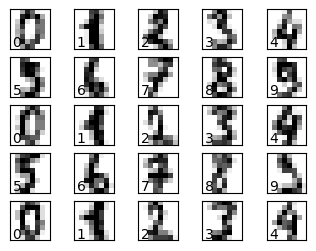

<Figure size 640x480 with 0 Axes>

In [14]:
# let us display the first 25 images, with their corresponding label

fig = plt.figure(figsize=(4, 3))

for i in range(25):
    ax = fig.add_subplot(5, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap=plt.cm.binary)
    ax.text(0, 7, str(digits.target[i]))

_ = plt.figure()

---

Next we will use Principal Component Analysis, or PCA for short (https://en.wikipedia.org/wiki/Principal_component_analysis) , to construct a 2-dimensional projection of the data and visualize the point cloud.

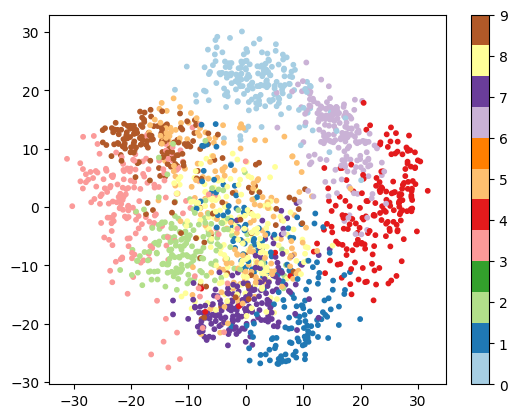

In [15]:
# from scikit learn, import Principal Components Analysis
from sklearn.decomposition import PCA

# we construct a PCA object with 2 components
pca = PCA(n_components=2)

# we compute the 2D projection of the digits data
proj2d = pca.fit_transform(digits.data)

# we display the projection, coloring each point by its label
plt.scatter(proj2d[:, 0], proj2d[:, 1], s= 10, c=digits.target, cmap="Paired");
plt.colorbar();

**Question:** According to the plot above, what digits would be easier to classify from the rest (i.e., are more tightly clustered within same label and separated from other labels), and what digits could present issues?  Since the plot is the result of doing dimensionality reduction (PCA), are there caveats to your answer? Please explain below.

**Your Answer:** I think it would be easy to classify numbers 0, 2, 4, and 9. I think 1, 7, 8, and 5 could present issues. 
Yes, there are caveats because of the 64 dimensions we only projected onto 2 and if we have projected onto a different two dimensions the point cloud might look different and the clustering of certain numbers might be different. 

---

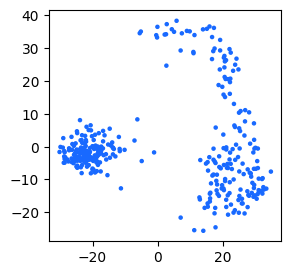

In [16]:
# let us now do a 2D projection of two of the classes

# find the indices for the images that contain a 0 or a 1
condition = (digits['target']==0) | (digits['target']==1)

# project to 2D using principal component analysis
pca = PCA(n_components=2)
proj = pca.fit_transform(digits.data[condition])
plt.figure(figsize = (3,3))
plot_clustering(proj)

We use k-means to find a clustering of the projected data (https://en.wikipedia.org/wiki/K-means_clustering). The k-means algorithm asks us to choose the number of clusters before hand. In this case, since we are clustering 2D data, it is possible to visualy estimate that there are 2 clusters.

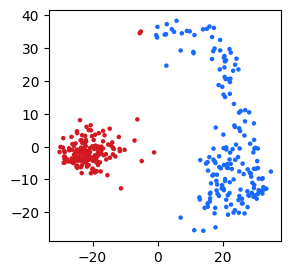

In [24]:
from sklearn.cluster import KMeans

target_number_of_clusters = 2
kmeans = KMeans(n_clusters=target_number_of_clusters, n_init=10)
clustering = kmeans.fit_predict(proj)

plt.figure(figsize = (3,3))
plot_clustering(proj, clustering)

**Questions:**
1. Does the result (i.e., the predicted clusters) change if you run kmeans several times? Why/Why not.
1. Does the result change if you do the clustering in $\mathbb{R}^{64}$ with the original data, instead of the 2D PCA projection? Why/why not?
1. If you change the number of target clusters from 2 to 3, does the result make sense? Is this still true in $\mathbb{R}^{64}$?

**Your Anwers:**
1. The result doesn't change, but the color switches. 
2. I would assume yes, because the other values in the array might cause certain points to be closer and may cause different clusters to form.
3. Yes. I don't know.

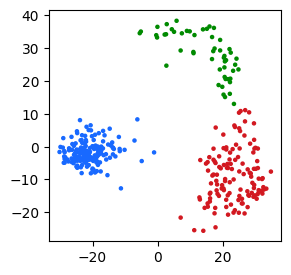

In [32]:
# Your code here

target_number_of_clusters =3
kmeans = KMeans(n_clusters=target_number_of_clusters, n_init=20)
clustering = kmeans.fit_predict(proj)

plt.figure(figsize = (3,3))
plot_clustering(proj, clustering)


---

There seems to be a fair amount of structure in the plot above. For instance, there seem to be two distinct clusters, one with significantly fewer points. The larger cluster seems also to have nontrivial structure. Let's now plot some of the digits on top of their corresponding point in the 2D embedding, to try to understand what the 2 principal components are capturing


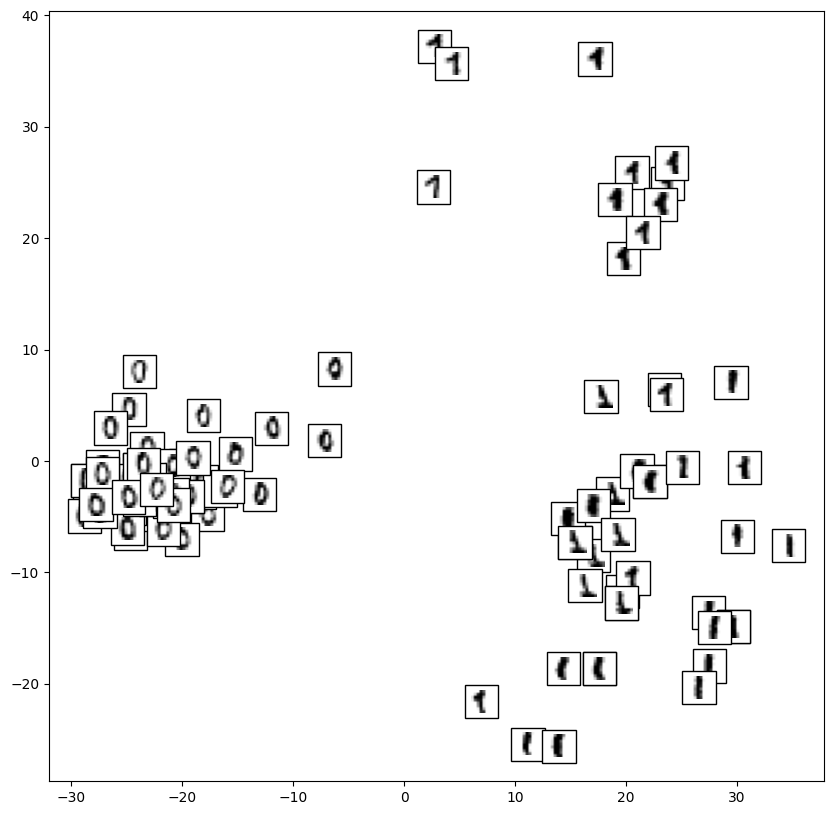

In [33]:
# plotting all the images would be too much, so let us just plot 100
subsample = np.random.choice(sum(condition), 100)

from matplotlib.offsetbox import OffsetImage, AnnotationBbox

fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(proj[subsample,0], proj[subsample,1]) 

for x0, y0, im in zip(proj[subsample,0], proj[subsample,1],digits["images"][condition][subsample]):
    ab = AnnotationBbox(OffsetImage(im, cmap='binary',zoom=2), (x0, y0))
    ax.add_artist(ab)

**Question:** How many clusters should there be? If you had to verbally explain who the clusters are, what would you say?

**Your Answer:** I think there should be three clusters. One cluster of the ones labeled by "0". Another cluser above the horizonal line at 15 and to the right of the vertical line at 0. And the last cluster below the horizonal line at 15 and to the right of the vertical line at 0.

---

### 4. Density-based clustering

We will now explore another example of clustering, this time from an application to astrophysics. The first pass will be only for the regions of the data where density is large (this was the goal of the paper), and you will then be able to run k-means as an excercise.

The data comes from the paper *X-Ray Star Clusters in the Carina Complex* by Feigelson et al., 2011 (https://iopscience.iop.org/article/10.1088/0067-0049/194/1/9). The cell below downloads and processes the data.

**Do:** Please read and run the cell below

In [34]:
# download table3 from https://cdsarc.cds.unistra.fr/ftp/J/ApJS/194/9/
# this contains the main dataset of the paper
# "X-RAY STAR CLUSTERS IN THE CARINA COMPLEX" Feigelson et al.

import requests
url = "https://cdsarc.cds.unistra.fr/ftp/J/ApJS/194/9/table3.dat"
response = requests.get(url)
data = response.text

# we now preprocess the data we downloaded. We will consider the subsample
# referred to as the "spatially complete sample" in section 2 of the paper.
# See https://cdsarc.cds.unistra.fr/ftp/J/ApJS/194/9/ReadMe for a description
# of the dataset
unfiltered_dataset = []
large_scale_region = []
class_broos = []
cluster_feigelson = []
photon_flux = []
for line in data.split('\n'):
    row = line.split()
    if len(row) > 0:
        # these are the two spatial coordinates of the data points
        unfiltered_dataset.append(row[3:5])
        # this quantifies how bright the source is
        photon_flux.append(row[6])
        # the following contains the label H2 for points that
        # are deemed to probably belong to the Carina complex
        class_broos.append(row[8])
        # this contains the cluster label as reported in the paper
        if len(row) == 11 and row[9][0] == "C":
            cluster_feigelson.append(int(row[9][1:]))
        else:
            cluster_feigelson.append(-1)
            
unfiltered_dataset = np.array(unfiltered_dataset, dtype=float)
cluster_feigelson = np.array(cluster_feigelson, dtype=int)
class_broos = np.array(class_broos, dtype=str)
photon_flux = np.array(photon_flux, dtype=float)

# photon threshold as in the paper
photon_flux_threshold = -5.9
bright_enough = (photon_flux > photon_flux_threshold)

# probable Carina members
probable_carina_members = (class_broos == "H2")

# we put the two conditions together
condition = bright_enough & probable_carina_members

# we filter the point cloud and the cluster labels using
# the two conditions above. So we are only looking for bright sources that
# are considered to probably belong to the Carina complex
X = unfiltered_dataset[condition]
cluster = cluster_feigelson[condition]

# print the size of the filtered data.
# NOTE: we are getting 2870 samples instead of the 3220 samples reported in
# section 2 of the paper. I do not know why this is. If you are interested,
# please look into it!
X.shape

(2870, 2)

Next we plot the data 

**Do:** Please run the cell below.

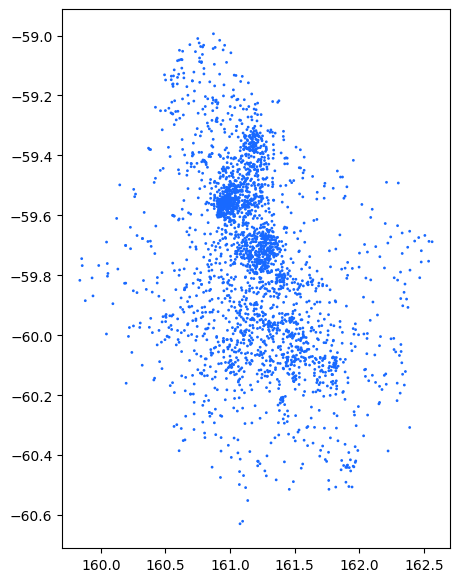

In [35]:
plt.figure(figsize=(5,7))
plot_clustering(X , sizes = [1, 1])

The goal is to find clusters of stars, but only for regions where there is a high density of stars. The cell below plots the clusters reported in the paper. Note that many of the data point are unclustered (the ones in grey). This is because they are not in a sufficiently dense region of the data.

**Do:** Please run the cell below.

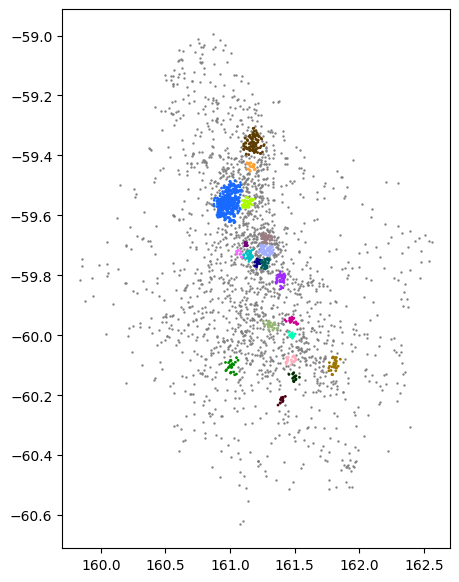

In [36]:
# Plot the clustering reported in the paper.
plt.figure(figsize=(5,7))
plot_clustering(X, cluster, sizes=[1,.5])

---

### 5. Exercise: try to cluster the dataset above using k-means

**Do:** In the cells below, try running k-means on the stars data. See if you can recover reasonable clusters  for (all or part of) the data. 

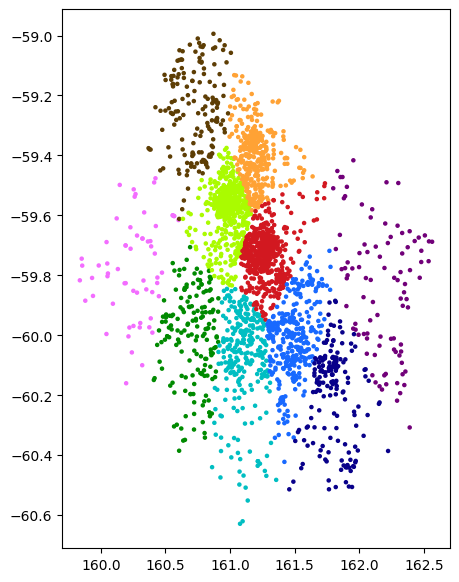

In [54]:
from sklearn.cluster import KMeans

target_number_of_clusters = 10
kmeans = KMeans(n_clusters=target_number_of_clusters, n_init=10)
clustering = kmeans.fit_predict(X)

plt.figure(figsize = (5,7))
plot_clustering(X, clustering)